## Setup

*Install any packages here and load data*

In [2]:
# Add any additional libraries or submodules below
from sklearn.impute import KNNImputer
# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn

# Add any additional libraries or submodules below
# Sklearn modules
import sklearn
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing necessary libraries for the analysis
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80



In [3]:
# Load the imputed DataFrame from the CSV file next time
df = pd.read_csv("easyshare_imputed.csv")

df.describe()

,int_year,wave,country,country_mod,female,age,birth_country,citizenship,isced1997_r,eduyears_mod,...,bmi2,smoking,ever_smoked,br010_mod,br015_,casp,chronic_mod,sp008_,ch001_,cogscore
count,98348.000000,98348.000000,98348.000000,98348.000000,98348.00000,98348.000000,98348.000000,98348.000000,98348.000000,98348.000000,...,98348.000000,98348.000000,98348.000000,98348.000000,98348.000000,98348.000000,98348.000000,98348.000000,98348.000000,98348.000000
mean,2010.467537,3.794612,24.272080,384.954135,0.54148,67.938640,398.473742,391.844096,2.658916,10.357658,...,2.850427,4.341156,3.256001,3.314380,2.673516,36.650172,1.306011,3.976654,2.173244,11.973714
std,4.609446,2.135395,12.237044,228.120624,0.49580,8.820107,236.258350,231.801339,1.486118,4.098175,...,0.751233,1.473567,1.971830,2.080354,1.317733,6.174605,1.263177,1.641224,1.394208,4.163572
min,2004.000000,1.000000,11.000000,40.000000,0.00000,55.099998,2.000000,4.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,0.000000,1.000000,0.000000,0.000000
25%,2006.000000,2.000000,15.000000,208.000000,0.00000,60.599998,208.000000,208.000000,1.000000,8.000000,...,2.000000,5.000000,1.000000,1.000000,1.000000,32.800000,0.000000,3.400000,1.000000,9.000000
50%,2011.000000,4.000000,20.000000,348.000000,1.00000,66.699997,348.000000,348.000000,3.000000,10.800000,...,3.000000,5.000000,5.000000,3.000000,3.000000,37.000000,1.000000,5.000000,2.000000,12.000000
75%,2013.000000,5.000000,31.000000,616.000000,1.00000,74.000000,620.000000,620.000000,3.000000,13.000000,...,3.000000,5.000000,5.000000,4.600000,4.000000,41.000000,2.000000,5.000000,3.000000,15.000000
max,2020.000000,8.000000,63.000000,756.000000,1.00000,111.599998,1101.000000,1132.000000,6.000000,30.000000,...,4.000000,5.000000,5.000000,7.000000,4.000000,48.000000,9.000000,5.000000,17.000000,26.000000


Data shows that, with population aging, dementia in the European population over 55 years old is a significant public health issue. To address the dementia prevalence across different age groups, we will divide the dataset into subsets labeled by age groups. Additionally, in Europe, the prevalence of dementia in the population over 55 increases with age. According to data from Alzheimer Europe, the prevalence rates for dementia by age group are as follows: 0.6% for 60-64 years old, 1.3% for 65-69 years old, 3.3% for 70-74 years old, 8% for 75-79 years old, 12.1% for 80-84 years old, 21.9% for 85-89 years old, and 40.8% for those over 90【[source](https://www.alzheimer-europe.org/dementia/prevalence-dementia-europe?language_content_entity=en)】. Additionally, a systematic review and meta-analysis of 9 studies conducted in Europe between 1993 and 2018 shows that, after adjusting for age and sex, the average prevalence rate of dementia was 7.1%【[source](https://pubmed.ncbi.nlm.nih.gov/30412486/)】.

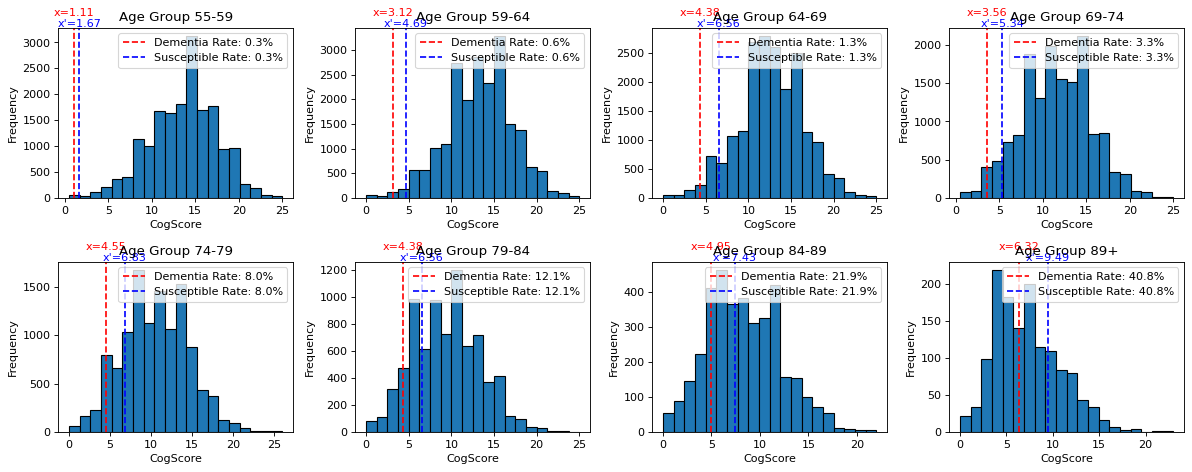

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame
# Define age segments and corresponding dementia rates
bins = [0, 59, 64, 69, 74, 79, 84, 89, float('inf')]
labels = ['55-59','59-64', '64-69', '69-74', '74-79', '79-84', '84-89', '89+']
dementia_rates = [0.3, 0.6, 1.3, 3.3, 8.0, 12.1, 21.9, 40.8]  # Dementia rates for each age group

# Create a new column for age grouping
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Obtain subsets for each age group
age_groups = {}
for label in labels:
    age_groups[label] = df[df['age_group'] == label]

n_groups = len(age_groups)
n_cols = 4  # Assuming 4 histograms per row
n_rows = n_groups // n_cols + (1 if n_groups % n_cols > 0 else 0)

plt.figure(figsize=(15, 3 * n_rows))

for i, (label, group_df) in enumerate(age_groups.items(), 1):
    plt.subplot(n_rows, n_cols, i)
    counts, bins, patches = plt.hist(group_df['cogscore'], bins=20, edgecolor='black')
    
    # Calculate cumulative frequency percentage
    cumulative_frequency = np.cumsum(counts) / sum(counts) * 100
    # Find the cogscore corresponding to the given rate of dementia
    rate = dementia_rates[min(i-1, len(dementia_rates)-1)]  # Ensure index doesn't go out of bounds
    rate_index = np.where(cumulative_frequency >= rate)[0][0]  # Find the first index that exceeds the given rate
    cogscore_at_rate = (bins[rate_index] + bins[rate_index + 1]) / 2  # Calculate the corresponding cogscore
    susceptible_at_rate = cogscore_at_rate * 1.5

    plt.axvline(x=cogscore_at_rate, color='r', linestyle='--', label=f'Dementia Rate: {rate}%')

    plt.axvline(x=susceptible_at_rate, color='b', linestyle='--', label=f'Susceptible Rate: {rate}%')
    # Annotate cogscore value above the red line
    plt.text(cogscore_at_rate, plt.ylim()[1]*1.07, f'x={cogscore_at_rate:.2f}', color='red', ha='center')
    
    plt.text(susceptible_at_rate, plt.ylim()[1]*1.005, f'x\'={susceptible_at_rate:.2f}', color='blue', ha='center')
    
    plt.title(f'Age Group {label}')
    plt.xlabel('CogScore')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


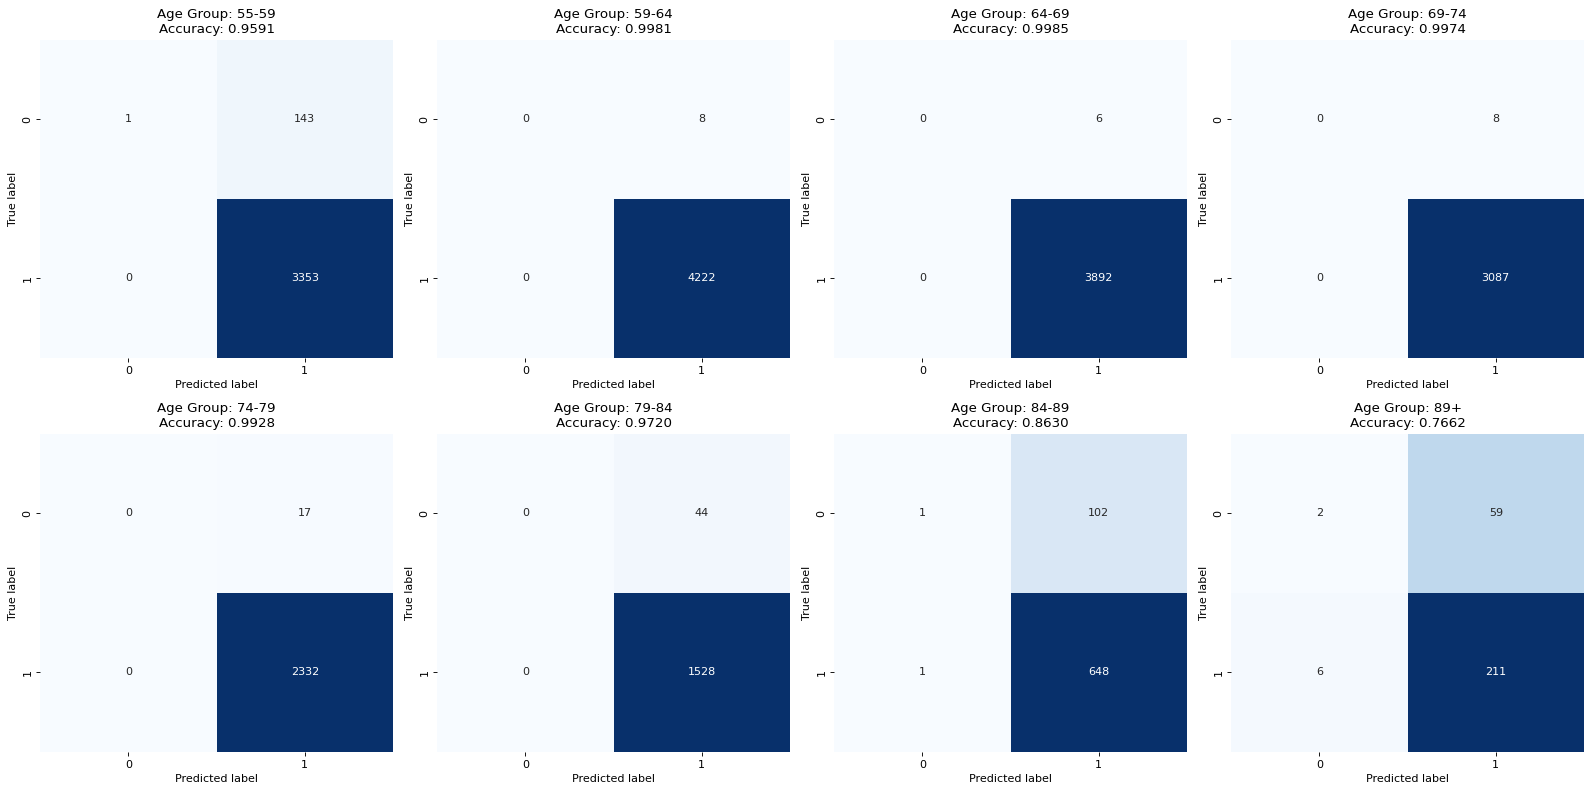

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import numpy as np
import pandas as pd

# Function: Draw a confusion matrix
def plot_confusion_matrix(ax, cm, classes, title='Confusion matrix'):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

# Initialize a 2x4 subplot layout
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Process each age group, train SVM model, and plot subplot
for i, (label, group_df) in enumerate(age_groups.items()):
    if i >= 8:  # Stop plotting if more than 8 subplots
        break
    
    # Split into two categories based on cogscore_at_rate
    rate = dementia_rates[min(i, len(dementia_rates)-1)]
    
    # Calculate cumulative frequency percentage
    cumulative_frequency = np.cumsum(counts) / sum(counts) * 100
    # Find the cogscore corresponding to the given rate of dementia
    rate = dementia_rates[min(i-1, len(dementia_rates)-1)]  # Ensure index doesn't go out of bounds
    rate_index = np.where(cumulative_frequency >= rate)[0][0]  # Find the first index that exceeds the given rate
    cogscore_at_rate = (bins[rate_index] + bins[rate_index + 1]) / 2  # Calculate the corresponding cogscore

    df_copy = group_df.copy()
    df_copy.loc[:, 'class'] = (df_copy['cogscore'] >= cogscore_at_rate).astype(int)
    df_copy.describe()
    X = df_copy.drop(['cogscore', 'class','age_group'], axis=1)  # Assume 'class' is the target column
    y = df_copy['class']  # Target data
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    # Train SVM model
    clf = svm.SVC(kernel='linear')
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    ax = axes[i//4, i%4]  # Determine the current subplot's position
    cm = confusion_matrix(y_test, y_pred)  # Obtain confusion matrix
    # Plot the confusion matrix on the specified subplot axis
    plot_confusion_matrix(ax, cm, classes=np.unique(y_test), title=f'Age Group: {label}\nAccuracy: {accuracy:.4f}')

# Adjust layout to prevent overlapping between subplots
plt.tight_layout()
plt.show()


Analyzing the model evaluation output for different age groups from "55-59" to "89+", several patterns and key points emerge:

1. **High Accuracy with Imbalanced Data**: Across all age groups, the accuracy scores are relatively high, ranging from 77.34% to 99.84%. However, the confusion matrices reveal a significant imbalance in the dataset, with the majority of instances belonging to class 1. This imbalance heavily influences the accuracy metric, making it less reliable for assessing model performance.

2. **Class 0 Underrepresented**: For each age group, class 0 is substantially underrepresented compared to class 1. In many cases, there are zero true positives (TP) for class 0, indicating the model's inability to correctly identify instances of this class. This is further evidenced by the recall for class 0 being 0.00 across most groups, meaning the model failed to correctly identify any true class 0 instances as such.

3. **Precision and Recall**: The precision for class 0 is consistently low or undefined (leading to modifications in the code to handle division by zero), reflecting the model's tendency to misclassify class 0 instances as class 1. The recall for class 1 is very high or perfect (1.00) in all groups, which, while initially seeming positive, actually underscores the model's bias towards predicting the majority class.

4. **F1-Score Analysis**: The F1-scores for class 0 are extremely low or 0.00, indicating poor model performance for this class. Conversely, F1-scores for class 1 are high, mirroring the precision and recall patterns. The weighted averages of F1-scores are skewed towards the performance on class 1 due to the class imbalance.

5. **Model Bias**: The consistent model behavior across age groups suggests a strong bias towards predicting instances as belonging to class 1. This could be due to the class imbalance within the training data, where the model has "learned" that predicting class 1 is usually correct and thus generalizes this strategy to unseen data.

Given the unsatisfactory performance of the SVM classification model, the primary reason identified is the lack of comprehensiveness in the model data. To address this issue and enhance the model's accuracy, we will employ a manual classification approach.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
# Function to label cogscore based on the specified ranges
X = df[['int_year', 'wave', 'country', 'female', 'age', 'birth_country', 'citizenship', 'isced1997_r', 'eduyears_mod', 'eurod', 'smoking', 'ever_smoked', 'br010_mod', 'br015_', 'casp', 'chronic_mod', 'sp008_', 'ch001_', 'log_age', 'log_ch001_', 'log_chronic_mod']] # Include the new interaction term
y = df['cogscore']

def label_cogscore_ranges(score):
    if score <= 5:
        return 0
    elif score <= 10:
        return 1
    elif score <= 15:
        return 2
    elif score <= 20:
        return 3
    else:
        return 4

# Apply the function to create a new column with labels based on the specified ranges
df['cogscore_range_label'] = df['cogscore'].apply(label_cogscore_ranges)

# Prepare data for model fitting with the new range-based labels
y_range_label = df['cogscore_range_label']

# Split the data into training and test sets with the new labels
X_train_range, X_test_range, y_train_range, y_test_range = train_test_split(X, y_range_label, test_size=0.3, random_state=42)

# Initialize and train the RandomForestClassifier with range-based labels
clf_range = RandomForestClassifier(n_estimators=100, random_state=42)
clf_range.fit(X_train_range, y_train_range)

# Predict on the test set with range-based labels
y_pred_range = clf_range.predict(X_test_range)

# Calculate the accuracy with range-based labels
accuracy_range = accuracy_score(y_test_range, y_pred_range)

print("accuracy rate:",accuracy_range)


# Calculate the confusion matrix
cm_range = confusion_matrix(y_test_range, y_pred_range)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm_range)

# Generate a classification report
report_range = classification_report(y_test_range, y_pred_range)

# Display the classification report
print("\nClassification Report:")
print(report_range)



KeyError: "['log_age', 'log_ch001_', 'log_chronic_mod'] not in index"